In [ ]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
city = pd.read_csv('/content/drive/MyDrive/2022_기초컴퓨터프로그래밍/seoul_info.csv',engine='python', encoding='cp949')
df = pd.read_csv('/content/drive/MyDrive/2022_기초컴퓨터프로그래밍/seoul_metro.csv',engine='python', encoding='cp949')

In [ ]:
city

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
0,3138041,개군면,양평군,경기도
1,3138040,용문면,양평군,경기도
2,3138039,지평면,양평군,경기도
3,3138038,양동면,양평군,경기도
4,3138037,청운면,양평군,경기도
...,...,...,...,...
1131,1101057,무악동,종로구,서울
1132,1101056,평창동,종로구,서울
1133,1101055,부암동,종로구,서울
1134,1101054,삼청동,종로구,서울


In [ ]:
city = city[city['시도_명칭'] == '서울']
city

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
712,1125074,길동,강동구,서울
713,1125073,천호2동,강동구,서울
714,1125072,암사1동,강동구,서울
715,1125071,둔촌2동,강동구,서울
716,1125070,둔촌1동,강동구,서울
...,...,...,...,...
1131,1101057,무악동,종로구,서울
1132,1101056,평창동,종로구,서울
1133,1101055,부암동,종로구,서울
1134,1101054,삼청동,종로구,서울


In [ ]:
df

,기준_날짜,행정동_ID,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
0,20220602,1107072,16962.0,1.0,0.0,0.0,0.0,0.0,445.0,909.0,...,572.0,644.0,763.0,831.0,906.0,597.0,428.0,342.0,277.0,148.0
1,20220602,1107068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20220602,1107060,21041.0,1.0,0.0,0.0,0.0,27.0,505.0,1020.0,...,752.0,774.0,1000.0,1027.0,1319.0,897.0,592.0,557.0,418.0,189.0
3,20220602,1107052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20220602,1106088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65715,20211130,1105057,10728.0,1.0,0.0,0.0,0.0,0.0,182.0,467.0,...,432.0,394.0,562.0,662.0,762.0,422.0,281.0,300.0,150.0,30.0
65716,20211130,1101061,95603.0,4.0,0.0,0.0,0.0,18.0,279.0,355.0,...,4781.0,6015.0,7236.0,12936.0,19579.0,8734.0,6512.0,7032.0,5214.0,1713.0
65717,20211130,1114066,101870.0,11.0,0.0,0.0,0.0,20.0,934.0,2075.0,...,3973.0,4469.0,5575.0,8175.0,13185.0,8303.0,6423.0,7907.0,7051.0,2576.0
65718,20211130,1114060,21633.0,0.0,0.0,0.0,0.0,2.0,184.0,517.0,...,975.0,1161.0,1450.0,2178.0,2229.0,1194.0,954.0,939.0,777.0,222.0


In [ ]:
#지하철이 다니지 않는 행정동에 대한 데이터를 삭제
df = df.dropna()
df

,기준_날짜,행정동_ID,지하철_승객_수,지하철_승객_수_00시,지하철_승객_수_01시,지하철_승객_수_02시,지하철_승객_수_03시,지하철_승객_수_04시,지하철_승객_수_05시,지하철_승객_수_06시,...,지하철_승객_수_14시,지하철_승객_수_15시,지하철_승객_수_16시,지하철_승객_수_17시,지하철_승객_수_18시,지하철_승객_수_19시,지하철_승객_수_20시,지하철_승객_수_21시,지하철_승객_수_22시,지하철_승객_수_23시
0,20220602,1107072,16962.0,1.0,0.0,0.0,0.0,0.0,445.0,909.0,...,572.0,644.0,763.0,831.0,906.0,597.0,428.0,342.0,277.0,148.0
2,20220602,1107060,21041.0,1.0,0.0,0.0,0.0,27.0,505.0,1020.0,...,752.0,774.0,1000.0,1027.0,1319.0,897.0,592.0,557.0,418.0,189.0
8,20220602,1105062,33240.0,0.0,0.0,0.0,0.0,2.0,324.0,1143.0,...,1420.0,1492.0,1589.0,2015.0,2289.0,1550.0,1097.0,790.0,649.0,225.0
10,20220602,1105053,49465.0,0.0,0.0,0.0,0.0,22.0,770.0,1026.0,...,2307.0,2582.0,3020.0,3862.0,4467.0,3033.0,2871.0,3094.0,3084.0,1423.0
14,20220602,1102073,8085.0,0.0,0.0,0.0,0.0,1.0,138.0,279.0,...,298.0,318.0,454.0,586.0,1090.0,704.0,419.0,279.0,265.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65712,20211130,1107065,9869.0,2.0,0.0,0.0,0.0,0.0,248.0,527.0,...,361.0,360.0,408.0,449.0,531.0,319.0,229.0,153.0,134.0,61.0
65715,20211130,1105057,10728.0,1.0,0.0,0.0,0.0,0.0,182.0,467.0,...,432.0,394.0,562.0,662.0,762.0,422.0,281.0,300.0,150.0,30.0
65716,20211130,1101061,95603.0,4.0,0.0,0.0,0.0,18.0,279.0,355.0,...,4781.0,6015.0,7236.0,12936.0,19579.0,8734.0,6512.0,7032.0,5214.0,1713.0
65717,20211130,1114066,101870.0,11.0,0.0,0.0,0.0,20.0,934.0,2075.0,...,3973.0,4469.0,5575.0,8175.0,13185.0,8303.0,6423.0,7907.0,7051.0,2576.0


In [ ]:
while(True):
  cmd = int(input("숫자를 입력하세요 (종료 : 0 , 예측 1): "))
  if(cmd == 1):
    location = input("예측하고 싶은 행정동의 이름을 입력하세요 : ")
    mycity = city[city['행정동_명칭'] == location]
    if (len(mycity) == 0):
      print("해당 행정동을 찾을 수 없습니다.")
    else:
      df2 = df[df['행정동_ID']==mycity.iloc[0,0]]
      if (len(df2) > 50 ):
        print(location + "의 지하철 전체 승객 수를 예측합니다.")
        #예측에 필요없는 데이터인 날짜와 행정동_ID 지우기
        df2 = df2.iloc[0:,2:]
        #승객 수가 없는 시간대의 데이터를 삭제
        df2 = df2.drop(["지하철_승객_수_01시","지하철_승객_수_02시","지하철_승객_수_03시"],axis=1)
        corr_matrix = df2.corr()
        corr_matrix = corr_matrix['지하철_승객_수'].sort_values(ascending=False)
        print("----- Correlation Matrix -----")
        print(corr_matrix)
        string = corr_matrix.index[1]
        print(f"----- {string}의 승객 수를 이용해 전체 승객 수를 예측합니다. -----")
        x = df2['지하철_승객_수'].values.reshape(-1,1)
        y = df2[string].values.reshape(-1,1)
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
        print('학습데이터의 샘플 수:', len(x_train))
        print('평가데이터의 샘플 수:', len(x_test))

        lr = LinearRegression()
        lr.fit(x_train,y_train)
        y_pred = lr.predict(x_train.reshape(-1,1))

        print("----- 실제 값과 예측 결과 -----")
        for i in range(10):
          print(f'실제:{y_train[i]} 예측:{y_pred[i]}')

        print("---- train 데이터 score -----")
        print(lr.score(x_train, y_train))
        print("---- test 데이터 score -----")
        print(lr.score(x_test, y_test))

        break
      else:
        print("예측을 위한 데이터가 부족합니다.")
  else:
    print("프로그램을 종료합니다.")
    break 

숫자를 입력하세요 (종료 : 0 , 예측 1): 1
예측하고 싶은 행정동의 이름을 입력하세요 : 장전동
해당 행정동을 찾을 수 없습니다.
숫자를 입력하세요 (종료 : 0 , 예측 1): 1
예측하고 싶은 행정동의 이름을 입력하세요 : 신촌동
신촌동의 지하철 전체 승객 수를 예측합니다.
----- Correlation Matrix -----
지하철_승객_수        1.000000
지하철_승객_수_19시    0.964681
지하철_승객_수_17시    0.961435
지하철_승객_수_16시    0.953776
지하철_승객_수_10시    0.953008
지하철_승객_수_18시    0.936699
지하철_승객_수_11시    0.902277
지하철_승객_수_09시    0.892736
지하철_승객_수_06시    0.887263
지하철_승객_수_15시    0.855709
지하철_승객_수_08시    0.794027
지하철_승객_수_07시    0.783627
지하철_승객_수_14시    0.749577
지하철_승객_수_13시    0.698443
지하철_승객_수_12시    0.695477
지하철_승객_수_20시    0.653393
지하철_승객_수_22시    0.616082
지하철_승객_수_21시    0.488813
지하철_승객_수_05시    0.484655
지하철_승객_수_23시    0.418063
지하철_승객_수_00시    0.302867
지하철_승객_수_04시    0.033696
Name: 지하철_승객_수, dtype: float64
----- 지하철_승객_수_19시의 승객 수를 이용해 전체 승객 수를 예측합니다. -----
학습데이터의 샘플 수: 124
평가데이터의 샘플 수: 31
----- 실제 값과 예측 결과 -----
실제:[1488.] 예측:[1389.92041441]
실제:[2025.] 예측:[1980.22892064]
실제:[1535.] 예측:[1590.82254565]
실제:[781.] 예측:[872.98486045]
실

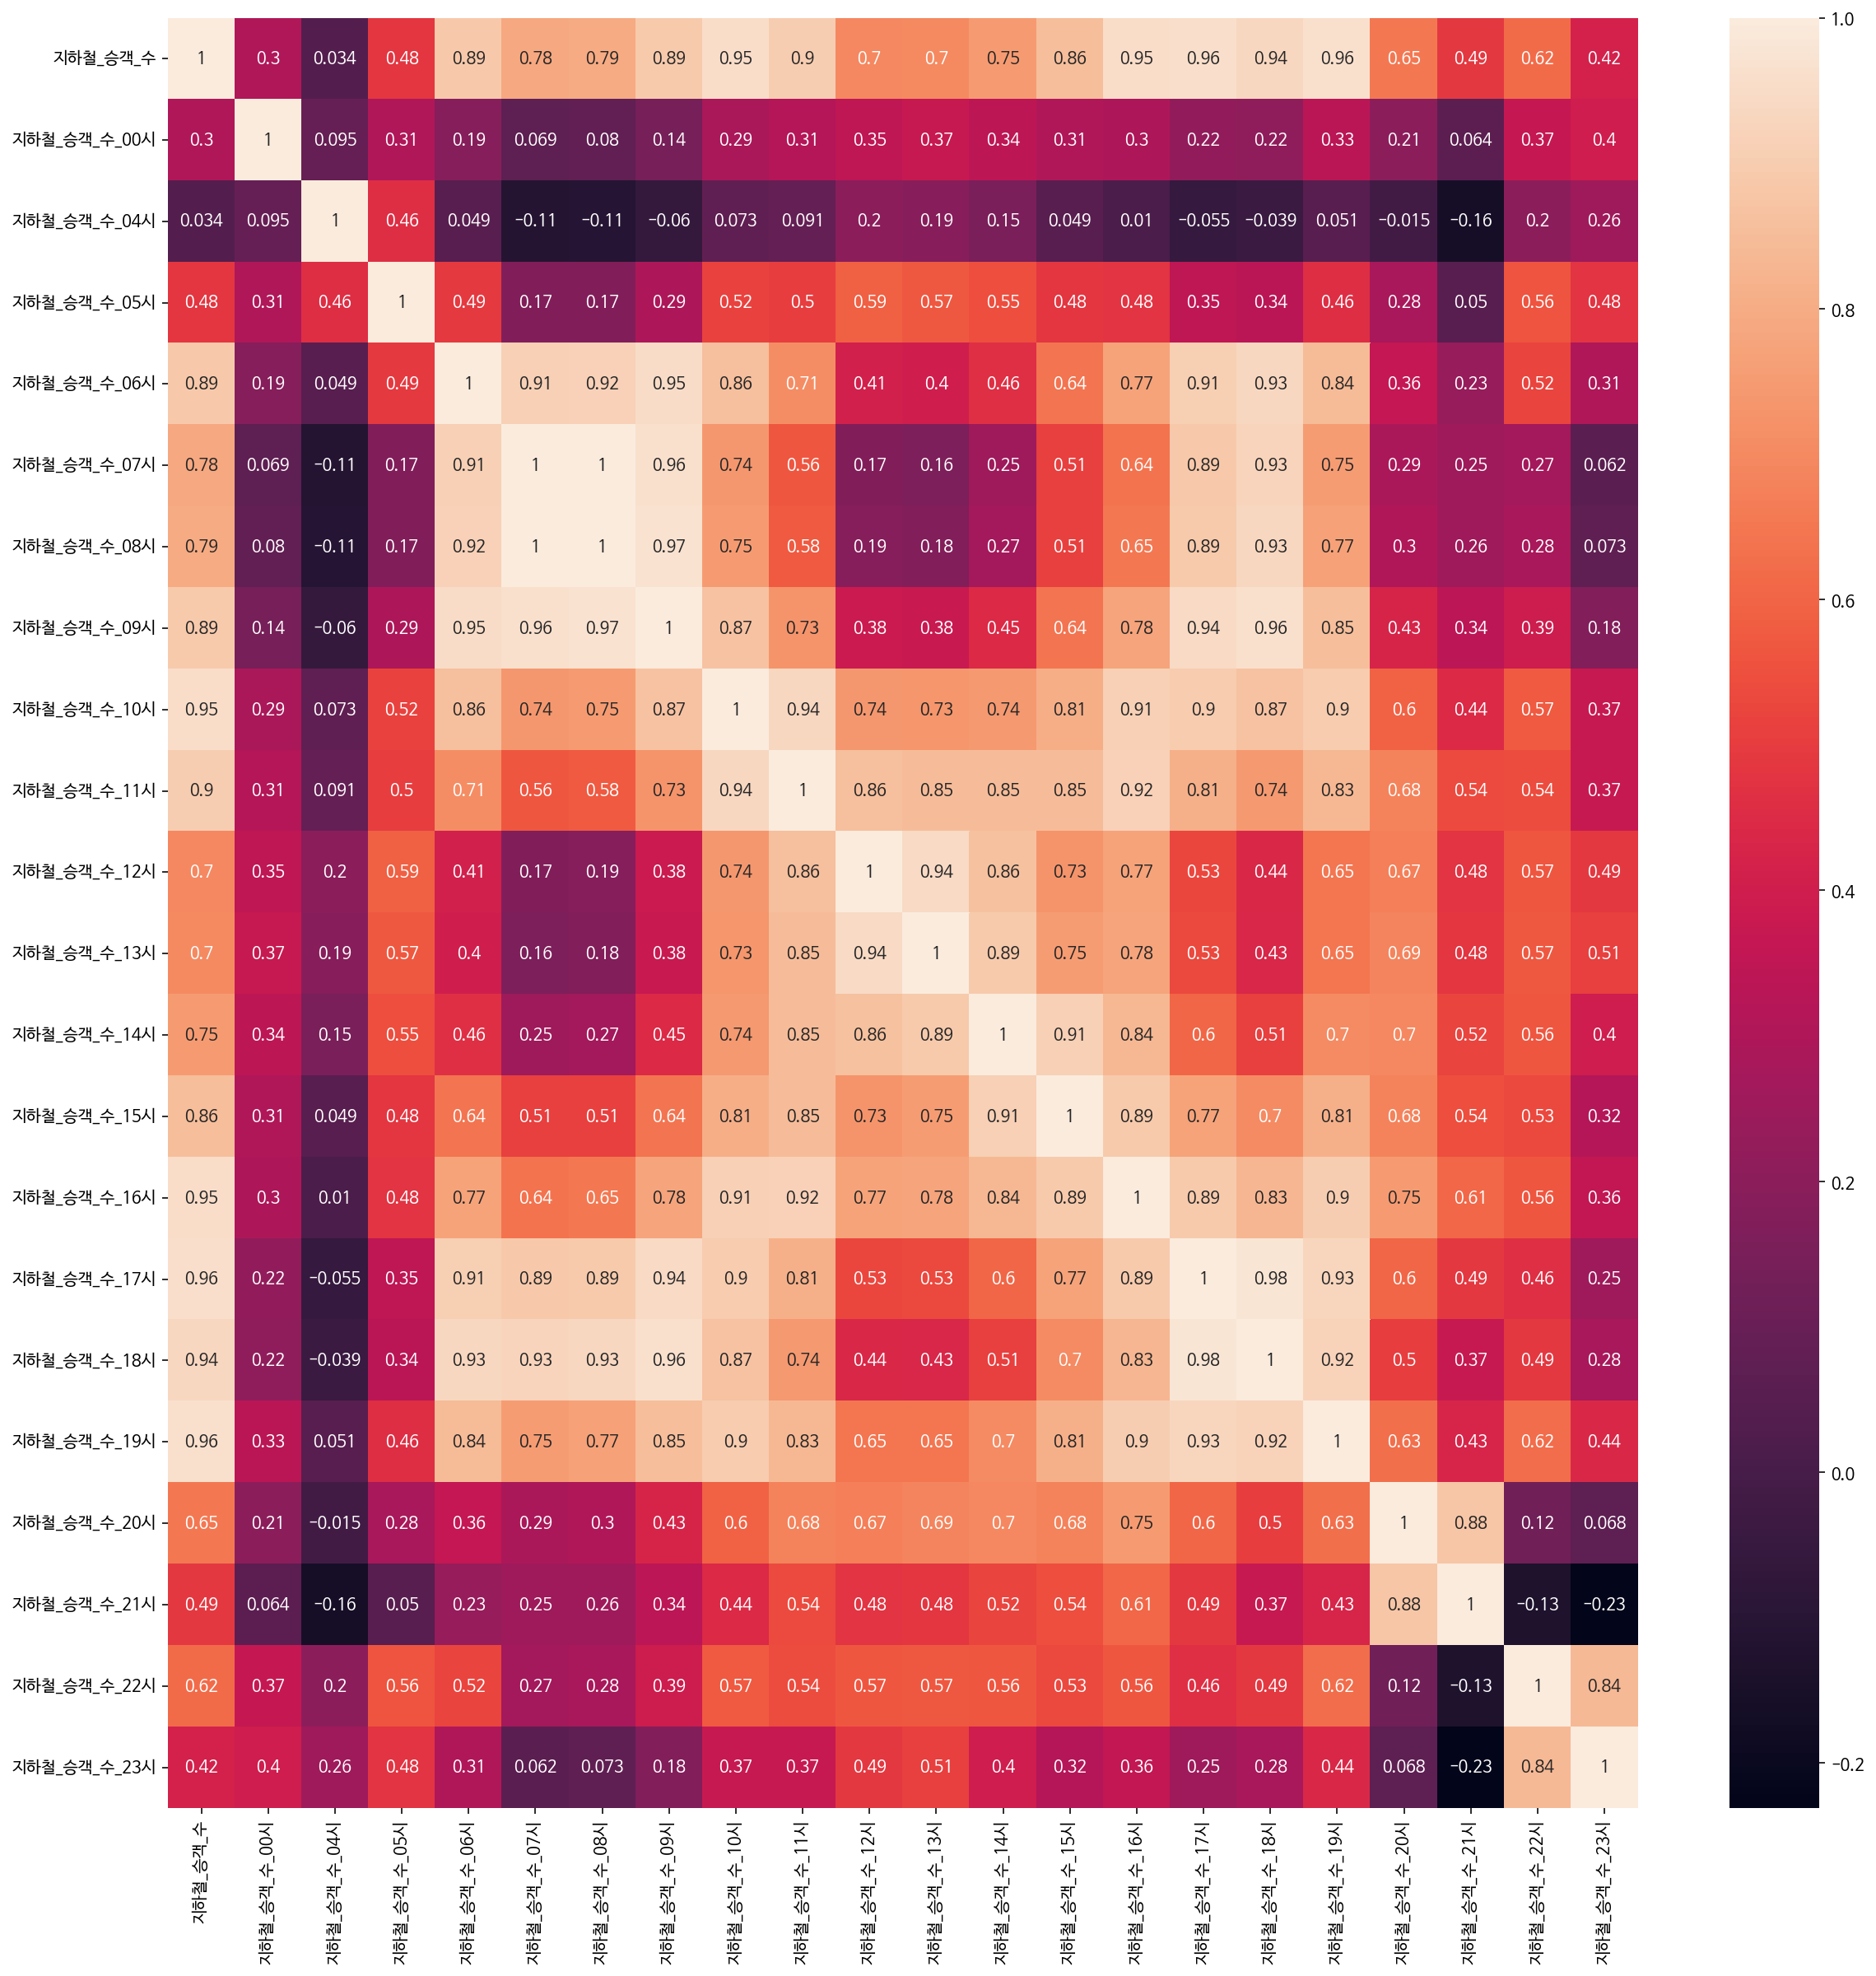

In [ ]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot = True, cbar = True)
plt.show()

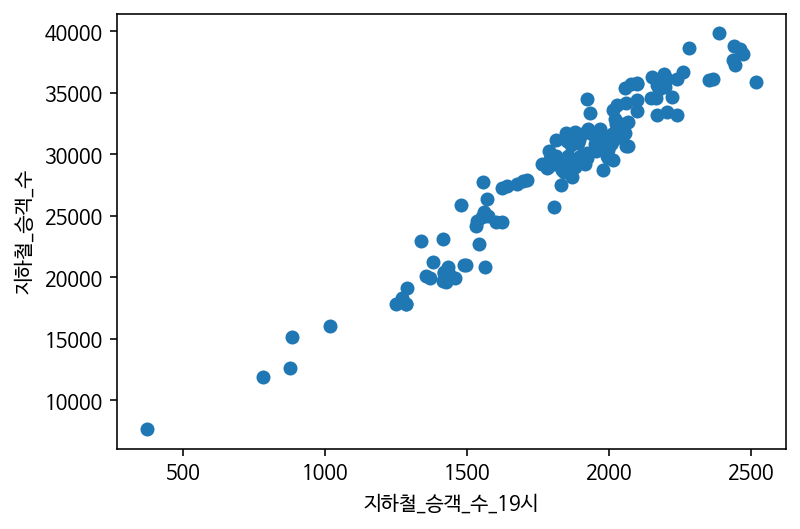

In [ ]:
plt.scatter(df2[string],df2['지하철_승객_수'])
plt.xlabel(string)
plt.ylabel("지하철_승객_수")
plt.show()